**Group Members**:

Akshaykumar Vijay Thakare

Hamza Kadodia

Meenakshi Krishnakumar

Parth Maheshbhai Patel

Rami Dhungana K C

Tharushika Jayawardena


## **Header Documentation**


**Introduction**:
Population growth has been a significant concern for governments, organizations, and society for many years. As the world's population continues to grow at an unprecedented rate, there are far-reaching implications for the environment, economy, and social welfare.
One of the potential solutions to address this problem is predicting population growth by gathering data on the current population and forecasting the expected growth in the coming years. This data can help governments, businesses, and other organizations to plan their policies, make informed decisions, allocate resources, and budget accordingly.
However, predicting population growth is a complex and multifaceted problem that requires a comprehensive and coordinated effort from all stakeholders, including governments, civil society, and the private sector. Traditionally, population forecasting methods were based on empirical modeling, which is only appropriate for capturing simple linear relationships.
In recent years, machine learning techniques have emerged as a powerful tool for predicting population growth. These techniques can handle complex and nonlinear relationships between demographic features, making them an ideal choice for predicting population growth rates.
In this project, we aim to develop a machine learning model for predicting population growth rate using various demographic features such as human population, population density, life expectancy at birth, female life expectancy at birth, infant mortality rate, total fertility rate. We will compare the performance of different machine learning models and select the most accurate and effective one for this problem.

**Objective:**
 Develop an accurate and efficient machine learning model for predicting population growth rate which can help governments, businesses, and other organizations make informed decisions and allocate resources effectively.

**Strategy:**
To achieve the goal of predicting population growth, we used the TPOT tool, which automates the machine learning pipeline and selects the best model based on the given data. We obtained demographic data from the United Nations database, which included seven demographic features of a given area. We performed exploratory data analysis (EDA) on the data and identified the most important features affecting population growth. We used regression methods to predict population growth and compared the accuracies of various machine learning models, including tree-based methods and neural networks.

**Challenges:**
•	One of the main challenges we faced in this project was the complexity of the problem of population growth. Predicting population growth requires a comprehensive understanding of demographic factors, which are interrelated and often influenced by various social, economic, and environmental factors.
•	Data set used in this project is large, which requires high computation power.

**Pipeline:**
To construct the pipeline for predicting population growth, we followed the following steps:
•	Obtain demographic data from reliable sources, such as the United Nations database.
•	Perform exploratory data analysis (EDA) to identify the most important features affecting population growth.
•	Use the TPOT tool to automate the machine learning pipeline and select the best model based on the given data.
•   Trained data with increased generations and max_time_mins which resulted in a better performing model.
•	Evaluate the model's performance using metrics such as mean squared error, mean absolute error, and R-squared.
•	Use the model to predict future population growth.





## **Problem Statement**

Population overgrowth is a critical issue that has been affecting the world for many years.This increase in population has far-reaching implications for both the environment and society as a wholesuch as human welfare, making it more difficult to solve economic, social, and political problems.

In order to address this problem, it is crucial to understand what are the other factors that contribute to overpopulation. One potential solution is that the countries can prepare themselves and gather the data of current population and predict that how much population will increse in upcoming years and basis on that, plan if they can foresee the future growth in population.

**1) The Issue / Context**

One of the major issues is unemployment. The areas where there is a high population density, the competition for jobs can be intense, leading to high unemployment rates.

Furthermore, due to overpopulation more land is needed for agriculture, housing, and other human activities.It also affects other areas such as Resources,Healthcare and pollution(Climate change due to lot of people).

**2) The Relevance**

As a result, It becomes challenging for individuals with limited education or job skills, as they may struggle to find work in an crowded job market.

Moreover if we talk about environment, more land is needed for agriculture, housing, and other human activities. This will lead to the destruction of forests and natural habitats, which can disrupt ecosystems and drive many species of plants and animals towards extinction.Lastly, With a growing population comes an increase in pollution like air pollution, water pollution, and soil pollution, which can all have negative impacts on the environment and the health of both humans and wildlife. So countries might be strugguling with these issues in the near future.

**3) The Objective / Solution / Proposed Method**

Upon research and from literature, the countries facing the challenge of overpopulation can leverage datasets and utilize machine learning algorithms to predict the increase in population for the coming years. We believe that if nations can foresee what is coming, they can plan and prepare accordingly. They can also plan resources and develop methodologies to reduce population growth in the first place if they know what impacts the growth.

Hence, the solution that we are proposing is to predict the population/population growth of a region using the demographic details from open-source platforms like Kaggle, UCI ML repository, etc.

Additionally, we would also analyse impact of each of the predictors. This would help in identifying the areas in which one needs to work on to tackle the problem at hand.

## **Python Code**

### **Library installations, imports & data read-in**

In [ ]:
# installing dependencies
!sudo apt-get install build-essential swig
!pip install TPOT
!pip install dask==2021.6.2 dask-glm==0.2.0 dask-ml==1.0.0
!pip install distributed==2021.6.2
!pip install cloudpickle==1.5.0
!pip install dask distributed --upgrade
!pip install tornado==5.1.0
!pip install xgboost==1.1.0
!pip install pipelineprofiler

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# importing libraries for training
from sklearn.model_selection import RepeatedKFold
from tpot import TPOTRegressor

In [3]:
# reading-in & inspecting the population data
df = pd.read_csv('population_data1.csv')
df.head()

,Row,FIPS,GENC,Country/Area Name,Year,Population,Annual Growth Rate %,Area (sq km),Density (per sq km),Total Fertility Rate,Life Expectancy at Birth,Under-5 Mortality Rate
0,1,AF,AF,Afghanistan,2015,32547550,2.306,652230,49.9,5.326,50.87,174.77
1,2,AF,AF,Afghanistan,2016,33310667,2.329,652230,51.1,5.220,51.27,171.72
2,3,AF,AF,Afghanistan,2017,34097944,2.343,652230,52.3,5.120,51.67,168.71
3,4,AF,AF,Afghanistan,2018,34907481,2.350,652230,53.5,5.020,52.06,165.75
4,5,AF,AF,Afghanistan,2019,35739709,2.362,652230,54.8,4.920,52.45,162.85


## Exploratory Data Analysis 

In [4]:
df.shape # checking the shape of the data

(2497, 12)

In [5]:
 # dropping columns not relevant for the analysis
df.drop(['Row', 'FIPS', 'GENC'], axis=1, inplace=True)

In [6]:
df.head() # data inspection

,Country/Area Name,Year,Population,Annual Growth Rate %,Area (sq km),Density (per sq km),Total Fertility Rate,Life Expectancy at Birth,Under-5 Mortality Rate
0,Afghanistan,2015,32547550,2.306,652230,49.9,5.326,50.87,174.77
1,Afghanistan,2016,33310667,2.329,652230,51.1,5.220,51.27,171.72
2,Afghanistan,2017,34097944,2.343,652230,52.3,5.120,51.67,168.71
3,Afghanistan,2018,34907481,2.350,652230,53.5,5.020,52.06,165.75
4,Afghanistan,2019,35739709,2.362,652230,54.8,4.920,52.45,162.85


In [7]:
df.info() # more information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country/Area Name         2497 non-null   object 
 1   Year                      2497 non-null   int64  
 2   Population                2497 non-null   int64  
 3   Annual Growth Rate %      2497 non-null   float64
 4   Area (sq km)              2497 non-null   int64  
 5   Density (per sq km)       2497 non-null   float64
 6   Total Fertility Rate      2492 non-null   float64
 7   Life Expectancy at Birth  2492 non-null   float64
 8   Under-5 Mortality Rate    2492 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 175.7+ KB


In [8]:
# fetching the list of countries/areas in the data
countries = np.unique(df['Country/Area Name'])
countries

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland',
  

In [10]:
df.isna().sum() # checking for missing values

Country/Area Name           0
Year                        0
Population                  0
Annual Growth Rate %        0
Area (sq km)                0
Density (per sq km)         0
Total Fertility Rate        5
Life Expectancy at Birth    5
Under-5 Mortality Rate      5
dtype: int64

## Missing Value Handling

In [11]:
df[df['Total Fertility Rate'].isna()] # inspecting the missing values

,Country/Area Name,Year,Population,Annual Growth Rate %,Area (sq km),Density (per sq km),Total Fertility Rate,Life Expectancy at Birth,Under-5 Mortality Rate
2354,United States,2015,320635163,0.73,9150541,35.0,NaN,NaN,NaN
2355,United States,2016,322941311,0.72,9150541,35.3,NaN,NaN,NaN
2356,United States,2017,324985539,0.63,9150541,35.5,NaN,NaN,NaN
2357,United States,2018,326687501,0.52,9150541,35.7,NaN,NaN,NaN
2358,United States,2019,328239523,0.48,9150541,35.9,NaN,NaN,NaN


From above, we can see that all the 5 missing values are from the country 'United States'. Hence, for this analysis, we remove the country from the data.

In [12]:
df = df[df['Country/Area Name']!='United States'] # 'United States' has missing values so removing the country

## Feature Engineering

In [13]:
# this cell shifts the demographic data to one row below.
# this will enable a row to have demographics from the previous year to predict the population for current year
prediction_data = pd.DataFrame()
for country in countries:
  orig_df = df[df['Country/Area Name']==country].sort_values('Year') # fetching the country's original data
  new_df = orig_df[['Country/Area Name', 'Year']] # storing the country name and year as such
  for c in orig_df.columns:
    if c not in ['Country/Area Name', 'Year', 'Population']: # storing all other columns as previous
      new_df['prev_'+c] = orig_df[c].shift(1)
  new_df['curr_population'] = orig_df['Population'] # adding population as current population (target column)
  prediction_data = pd.concat([prediction_data, new_df]) # concating each country's data beneath the other
 

In [14]:
prediction_data.head(11) # data inspection

,Country/Area Name,Year,prev_Annual Growth Rate %,prev_Area (sq km),prev_Density (per sq km),prev_Total Fertility Rate,prev_Life Expectancy at Birth,prev_Under-5 Mortality Rate,curr_population
0,Afghanistan,2015,NaN,NaN,NaN,NaN,NaN,NaN,32547550
1,Afghanistan,2016,2.306,652230.0,49.9,5.326,50.87,174.77,33310667
2,Afghanistan,2017,2.329,652230.0,51.1,5.220,51.27,171.72,34097944
3,Afghanistan,2018,2.343,652230.0,52.3,5.120,51.67,168.71,34907481
4,Afghanistan,2019,2.350,652230.0,53.5,5.020,52.06,165.75,35739709
5,Afghanistan,2020,2.362,652230.0,54.8,4.920,52.45,162.85,36594776
6,Afghanistan,2021,2.366,652230.0,56.1,4.820,52.84,159.98,37466414
7,Afghanistan,2022,2.342,652230.0,57.4,4.720,53.25,157.03,38346720
8,Afghanistan,2023,2.304,652230.0,58.8,4.624,53.65,154.13,39232003
9,Afghanistan,2024,2.262,652230.0,60.2,4.528,54.05,151.27,40121552


In [15]:
# Since 2015 has no previous year's data, we cannot use the year for any analysis. Hence removing.
prediction_data = prediction_data[prediction_data.Year!=2015] 

In [16]:
prediction_data.to_excel('population_prediction1.xlsx', index=False) # storing 

## More EDA on the feature engineered data

In [59]:
df = prediction_data.copy()
df.describe()

,Year,prev_Annual Growth Rate %,prev_Area (sq km),prev_Density (per sq km),prev_Total Fertility Rate,prev_Life Expectancy at Birth,prev_Under-5 Mortality Rate,curr_population
count,2260.000000,2260.000000,2.260000e+03,2260.000000,2260.000000,2260.000000,2260.000000,2.260000e+03
mean,2020.500000,1.009418,5.427899e+05,453.730752,2.480768,73.940712,28.626142,3.298484e+07
std,2.872917,1.185942,1.619110e+06,1961.644425,1.185249,7.217593,30.423572,1.341521e+08
min,2016.000000,-8.058000,2.000000e+00,0.000000,0.980000,42.560000,1.910000,5.070000e+03
25%,2018.000000,0.284000,4.033000e+03,38.750000,1.700000,69.787500,7.757500,6.032098e+05
50%,2020.500000,0.899500,7.995950e+04,97.550000,2.005400,75.385000,16.025000,5.792036e+06
75%,2023.000000,1.778250,4.254000e+05,234.325000,2.880000,79.170000,40.180000,2.290520e+07
max,2025.000000,6.390000,1.637774e+07,23015.200000,7.500000,89.760000,174.770000,1.419317e+09


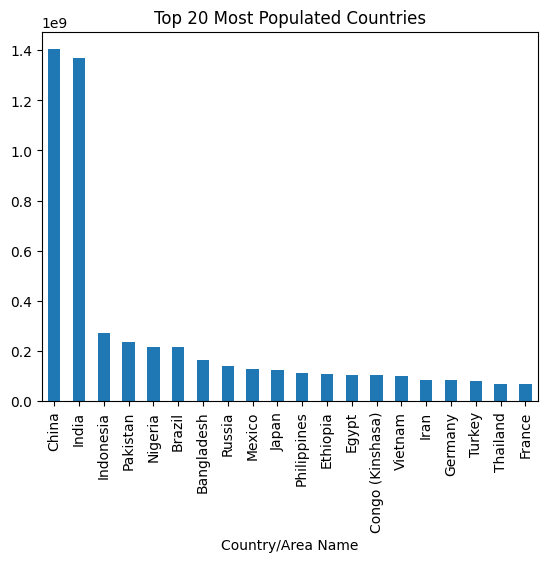

In [60]:
df.groupby('Country/Area Name').mean()['curr_population'].sort_values(ascending=False)[:20].plot(kind='bar')
plt.title("Top 20 Most Populated Countries")
plt.show()

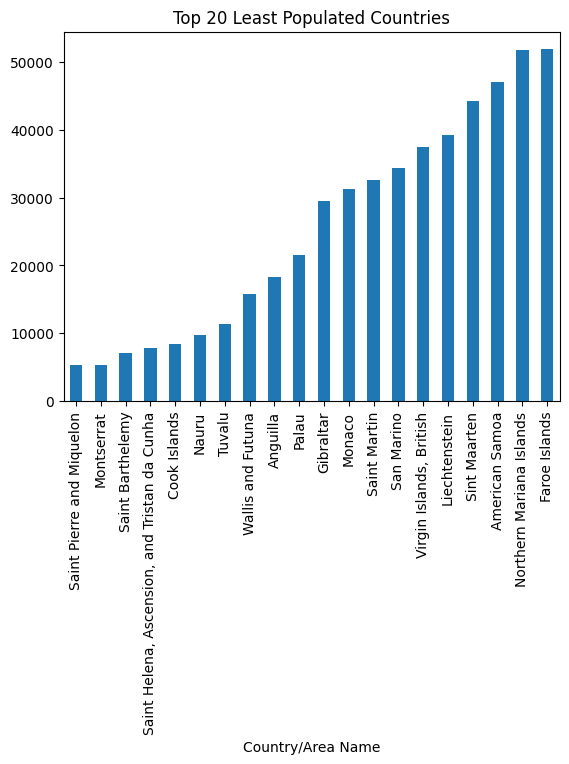

In [61]:
df.groupby('Country/Area Name').mean()['curr_population'].sort_values(ascending=True)[:20].plot(kind='bar')
plt.title("Top 20 Least Populated Countries")
plt.show()

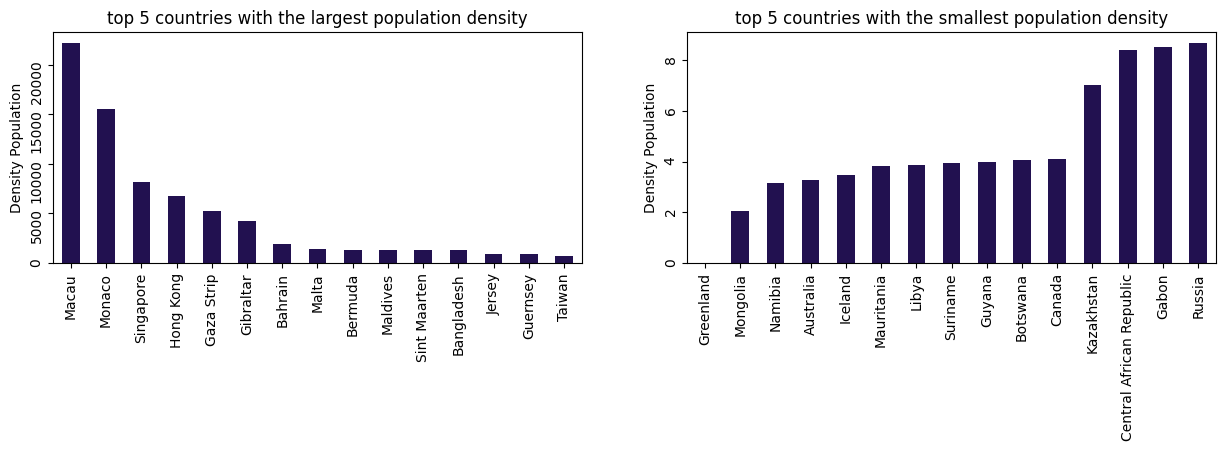

In [62]:
df_grouped = df.groupby(['Country/Area Name']).mean().reset_index()
fig, ax = plt.subplots(1, 2, figsize=(15,3))
palette_color = sns.color_palette('magma')
df_grouped[['Country/Area Name', 'prev_Density (per sq km)']].sort_values(by='prev_Density (per sq km)', ascending=False).iloc[:15, :].set_index('Country/Area Name').plot(kind='bar',
                                                                                                                                   color=palette_color,
                                                                                                                                   legend=False,
                                                                                                                                   ax=ax[0],
                                                                                                                                   xlabel='',
                                                                                                                                   ylabel='Density Population',
                                                                                                                                   title='top 5 countries with the largest population density')
df_grouped[['Country/Area Name', 'prev_Density (per sq km)']].sort_values(by='prev_Density (per sq km)').iloc[:15, :].set_index('Country/Area Name').plot(kind='bar',
                                                                                                                  color=palette_color,
                                                                                                                  legend=False,
                                                                                                                  ax=ax[1],
                                                                                                                  xlabel='',
                                                                                                                  ylabel='Density Population',
                                                                                                                  title='top 5 countries with the smallest population density')
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)
plt.show()

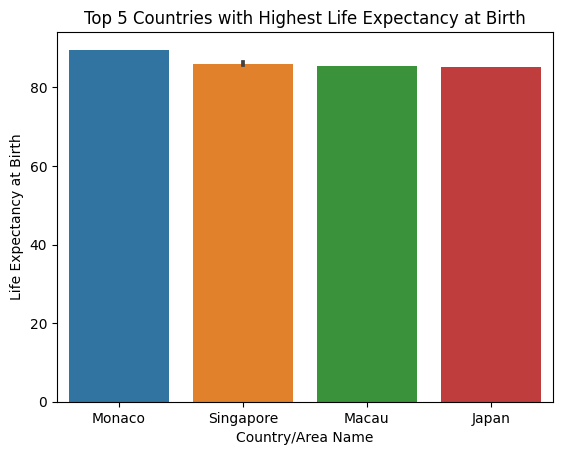

In [63]:
# Select the top 5 countries with the highest life expectancy at birth
df_top_life = df.nlargest(20, 'prev_Life Expectancy at Birth')

# Create a bar chart
sns.barplot(x='Country/Area Name', y='prev_Life Expectancy at Birth', data=df_top_life)
plt.title('Top 5 Countries with Highest Life Expectancy at Birth')
plt.xlabel('Country/Area Name')
plt.ylabel('Life Expectancy at Birth')

# Show the plot
plt.show()

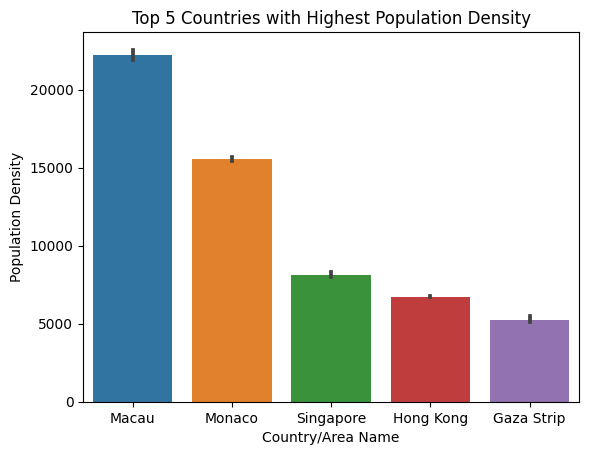

In [64]:
# Select the top 5 countries with the highest life expectancy at birth
df_top_life = df.nlargest(50, 'prev_Density (per sq km)')

# Create a bar chart
sns.barplot(x='Country/Area Name', y='prev_Density (per sq km)', data=df_top_life)
plt.title('Top 5 Countries with Highest Population Density')
plt.xlabel('Country/Area Name')
plt.ylabel('Population Density')

# Show the plot
plt.show()

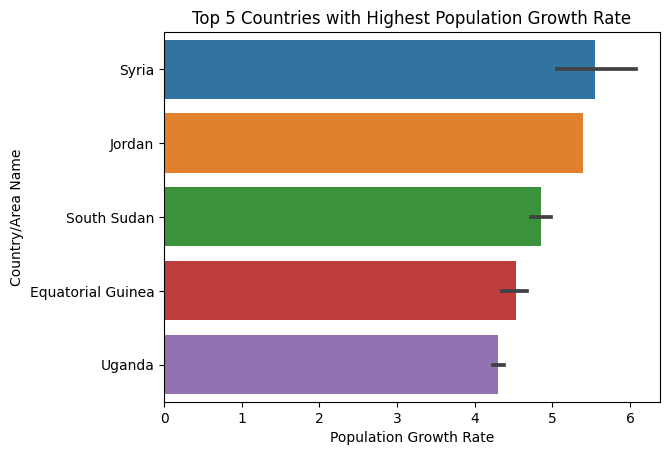

In [65]:
# Select the top 5 countries with the highest population density
df_top_density = df.nlargest(15, 'prev_Annual Growth Rate %')

# Create a horizontal bar chart
sns.barplot(x='prev_Annual Growth Rate %', y='Country/Area Name', data=df_top_density)
plt.title('Top 5 Countries with Highest Population Growth Rate')
plt.xlabel('Population Growth Rate')
plt.ylabel('Country/Area Name')

# Show the plot
plt.show()

In [66]:
prediction_data.isna().sum() # checking for missing values again

Country/Area Name                0
Year                             0
prev_Annual Growth Rate %        0
prev_Area (sq km)                0
prev_Density (per sq km)         0
prev_Total Fertility Rate        0
prev_Life Expectancy at Birth    0
prev_Under-5 Mortality Rate      0
curr_population                  0
pred_population                  0
dtype: int64

# Splitting the data

Since this data contains a temporal component, we split the data for train & test sequentially and not randomly.

We use data from upto (including) 2020 for training, data from 2021 upto (including) 2022 for testing and finally, we keep data from 2023 and above for projections (theyy being the future years).

In [19]:
# splitting train, test and projection data

training_data = prediction_data[prediction_data['Year']<=2020]
test_data = prediction_data[(prediction_data['Year']>2020) & (prediction_data['Year']<=2022)]
projection_data = prediction_data[(prediction_data['Year']>2022)]

print("Train")
print(training_data.Year.value_counts())
print("Test")
print(test_data.Year.value_counts())
print("Projection")
print(projection_data.Year.value_counts())

Train
2016    226
2017    226
2018    226
2019    226
2020    226
Name: Year, dtype: int64
Test
2021    226
2022    226
Name: Year, dtype: int64
Projection
2023    226
2024    226
2025    226
Name: Year, dtype: int64


In [20]:
training_data.shape # checking the number of rows in the training data

(1130, 9)

In [21]:
test_data.shape # checking the number of rows in the test data

(452, 9)

## Modeling

In [22]:
def preprocess(input_data):
  """
  Function to preprocess the data. 
  """
  data = input_data.drop(['Country/Area Name', 'Year'], axis=1).values
  data = data.astype('float32')
  X, y = data[:,:-1], data[:, -1]
  return(X, y)

In [44]:
# training

X_train, y_train = preprocess(training_data) # preprocessing the train data

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) # initialising the KFold

# initialising the TPOTRegressor
modelTPOTB = TPOTRegressor(generations=10, 
                           population_size=100, 
                           scoring='neg_mean_absolute_error',
                           cv=cv, 
                           verbosity=2,
                           random_state=1, 
                           n_jobs=-1, # use as many cores as available on the computer in parallel for evaluating pipelines
                           max_time_mins=75,
                           early_stop=3)

modelTPOTB.fit(X_train, y_train) # training
modelTPOTB.export('TPOT_population_prediction_best_model.py') # exporting the best model to a Python script
modelTPOTB.fitted_pipeline_ # checking the details of the fitted pipeline

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -444027.888258528

Generation 2 - Current best internal CV score: -444027.888258528

Generation 3 - Current best internal CV score: -417067.368234346

Generation 4 - Current best internal CV score: -417067.368234346

Generation 5 - Current best internal CV score: -415164.7147860601

Generation 6 - Current best internal CV score: -401885.2703226222

Generation 7 - Current best internal CV score: -391947.1319218288

75.19 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(StandardScaler(AdaBoostRegressor(input_matrix, learning_rate=0.01, loss=exponential, n_estimators=100)), bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=1, min_samples_split=3, n_estimators=100)


Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=AdaBoostRegressor(learning_rate=0.01,
                                                               loss='exponential',
                                                               n_estimators=100,
                                                               random_state=1))),
                ('standardscaler', StandardScaler()),
                ('extratreesregressor',
                 ExtraTreesRegressor(max_features=0.7500000000000001,
                                     min_samples_split=3, random_state=1))])

## Evaluation

In [45]:
# importing evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
def evaluate(y_true, y_pred):
  """
  Function to evaluate and display the evaluation metrics
  """
  print("    RMSE: ", round(np.sqrt(mean_squared_error(y_true, y_pred)), 4))
  print("     MAE: ", round(mean_absolute_error(y_true, y_pred), 4))
  print("R2 Score: ", round(r2_score(y_true, y_pred), 4))


In [47]:
print("Evaluation on Training Data")
evaluate(y_train, modelTPOTB.fitted_pipeline_.predict(X_train))

print("\nEvaluation on Test Data")
X_test, y_test = preprocess(test_data)
evaluate(y_test, modelTPOTB.fitted_pipeline_.predict(X_test))

Evaluation on Training Data
    RMSE:  368271.0691
     MAE:  92571.631
R2 Score:  1.0

Evaluation on Test Data
    RMSE:  3124086.9994
     MAE:  889171.1944
R2 Score:  0.9995


In [48]:
print("Evaluation on Projected Data")
X_projection, y_projection = preprocess(projection_data)
evaluate(y_projection, modelTPOTB.fitted_pipeline_.predict(X_projection))

Evaluation on Projected Data
    RMSE:  5850718.289
     MAE:  1696009.5154
R2 Score:  0.9982


In [49]:
# checking the parameters of the best model
modelTPOTB.fitted_pipeline_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=AdaBoostRegressor(learning_rate=0.01,
                                                               loss='exponential',
                                                               n_estimators=100,
                                                               random_state=1))),
                ('standardscaler', StandardScaler()),
                ('extratreesregressor',
                 ExtraTreesRegressor(max_features=0.7500000000000001,
                                     min_samples_split=3, random_state=1))])>

## Final Population Projections

In [54]:
# to make predictions on the entire data
X, y_true = preprocess(prediction_data.drop(['pred_population'], axis=1))
y_pred = modelTPOTB.fitted_pipeline_.predict(X)

In [55]:
# evaluating the model's performance on the entire data
evaluate(y_true, y_pred)

    RMSE:  3505576.5653
     MAE:  732922.909
R2 Score:  0.9993


In [56]:
# adding the predictions to the input dataframe & saving 
prediction_data['pred_population'] = y_pred
prediction_data.to_excel('population_final_predictions1.xlsx', index=False) # storing 

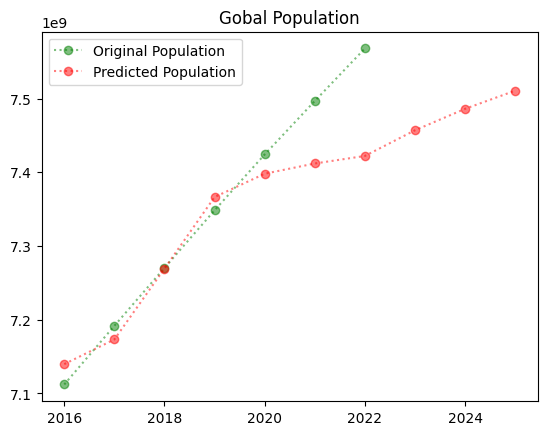

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

prediction_data = pd.read_excel('population_final_predictions1.xlsx')

# Total trend in population projections over the globe
df_ = prediction_data.groupby(['Year']).sum(numeric_only=True).reset_index()
plt.plot(df_[df_['Year'].astype('int')<2023]['Year'], df_[df_['Year'].astype('int')<2023]['curr_population'], 
               marker='o', 
               alpha=0.5,
               linestyle=':',
               color='g',
               label='Original Population')
plt.plot(df_['Year'], df_['pred_population'], 
               marker='o', 
               alpha=0.5,
               linestyle=':',
               color='r',
               label='Predicted Population')
plt.legend()
plt.title('Gobal Population')
plt.show()

# Visualisation of Country-wise Population Trends

**Run the following cell alone to display the output of the cell.**

In the output cell, you can choose a country from the drop down menu to visualise the corresponding trend.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

prediction_data = pd.read_excel('population_final_predictions1.xlsx')

from ipywidgets import interact, Dropdown

print("Select a country to see the it's population growth trend.")

areas = prediction_data['Country/Area Name'].unique()

area_widget = Dropdown(options = areas)

@interact(Country = area_widget)
def display_country(Country):
      df_ = prediction_data[prediction_data['Country/Area Name']==Country].groupby(['Year']).mean(numeric_only=True).reset_index()      
      plt.plot(df_[df_['Year'].astype('int')<2023]['Year'], df_[df_['Year'].astype('int')<2023]['curr_population'], 
               marker='o', 
               alpha=0.5,
               linestyle=':',
               color='g',
               label='Original Population')
      plt.plot(df_['Year'], df_['pred_population'], 
               marker='o', 
               alpha=0.5,
               linestyle=':',
               color='r',
               label='Predicted Population')
      plt.legend()
      plt.xlabel("Year")
      plt.ylabel('Population')
      plt.title(f'Population over the years in {Country}')
      plt.show()
      print(df_[['Year', 'curr_population', 'pred_population']].head(10))


Select a country to see the it's population growth trend.


interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'American …

## **Machine Learning Prediction & Outcomes**

According to our research we expected to predict human population growth rate (PGR) using various ML models and compares the output accuracies against each others'. Countries' demographic data was obtained from United Nations database in which seven demographic features of a given area including its population, density, several mortality rates and life expectancies were available. The target (PGR) was made categorical (high, medium and low). We performed EDA on data and used regression method.

As expected, the study's analyses on the data showed that PGR was proportional directly to mortality and fertility rates but inversely to popuation, density and life expectancy. Also, it concludes that tree-based methods have an upperhand on the accuracies on the test data.

The research papers use different models based on different factors affecting population growth. There are many factors affecting population growth such as birth rate, death rate, migration, and population density, some based on demographic parameters and some on life expectancy.

The research paper lets us know that the most important feature affecting the population growth is birth rate, death rate and migration. Equal percentage of these factors will not affect population growth but if any one factor increase or decreases, then it will result in population change. 

In our case we have human population, population density, life expectancy at birth, female life expectancy at birth, infant mortality rate, total fertility rate etc. And as discussed earlier tree-based methods works best.

So, our expectations where matched using TPOT tool who predicted population growth which had human population, population density, life expectancy at birth, female life expectancy at birth, infant mortality rate, total fertility rate etc.

TPOT met our expectations of  tree-based learners and thereby aided us in formulating our hypothesis to the problem.

TPOT gives you the best model and works on decision tree



## **Visualization & Documentation**

We visualised trends in data by visualizing through bar graphs also the results from the model using Python's matplotlib library. We used line charts to plot the historic population and the projected data. It is available in the last cell of the Python Code section. One can select a country from the dropdown to visualise it's population trends. 

We trained data with increased generations and max_time_mins which resulted in a better performing model.


We did not compare with our second assignment because that model was trained for less time and was not enough as per our expectations.So now we obtained a tree-based model which was expected from our research


This is easy to understand but conveys the information well.


Reference links for our projects:
1) https://www.mdpi.com/1099-4300/23/6/656

2)https://www.researchgate.net/publication/338656997_Comparative_Analysis_of_Different_Machine_Learning_Models_for_Estimating_the_Population_Growth_Rate_in_Data-Limited_Area

3)https://ejmcm.com/article_7352.html

4)https://www.kaggle.com/code/joshuaswords/awesome-eda-2021-happiness-population/notebook#I-am-still-adding-to-this-notebook---be-sure-to-check-back-soon

**Data Source:** https://www.census.gov/




## **Trailer Documentation**

**Parth Maheshbhai Patel**
Throughout the three assignments, I expanded my skill set in various domains such as feature engineering, data preparation, AutoML approaches, model selection and optimization, and model evaluation. To evaluate the accuracy of the models generated, I utilized metrics such as RMSE and R-squared and worked diligently to fine-tune these models to achieve the best possible scores. This process involved experimenting with various feature engineering and data preparation techniques, as well as using AutoML libraries like TPOT to automate parts of the model selection and optimization process. Overall, I gained practical experience working with these techniques and tools, enabling me to build more effective machine-learning models.

**Meenakshi Krishnakumar**
While developing a population prediction model, I utilized TPOT to automate the process of selecting the most appropriate algorithm, feature engineering techniques, and hyperparameter tuning. However, I also recognized the critical role that visualization plays in understanding and communicating the insights gained from the model. As a result, I devoted significant attention to improving the visualizations in this assignment. Going forward, I believe more in-depth analysis could be conducted through visualizations, such as exploring differences between regions or analyzing time trends. By effectively using visualization techniques, we can gain a more comprehensive understanding of the data and the predictions generated by the model.

**Rami Dhungana K C**
In my opinion, the research aspect was the most critical part of the assignment as it provided valuable insights into how similar solutions are implemented in real-world scenarios. Through this process, I gained a deeper understanding of the challenges involved in developing effective machine learning models, and the importance of selecting the most appropriate algorithm and hyperparameters for the given dataset.Additionally, I found TPOT to be a valuable tool that saves time by automating these processes, allowing us to focus on the more critical aspects of the project. Overall, I believe that this assignment provided an excellent opportunity to apply these techniques and gain practical experience working with them.

**Akshaykumar Vijay Thakare**
In this project, I utilized the TPOT tool to automate the machine learning pipeline and select the best model for predicting population growth.we obtained demographic data from the United Nations database, which included seven demographic features for a given area. Then we implemented exploratory data analysis (EDA), which helped to identify the most important features affecting population growth. Finally, we were able to implement machine learning model capable of accurately forecasting population growth rates.

**Hamza Kadodia**
In my opinion, the pipeline that I developed for predicting population growth was effective and successful. By following the above-mentioned steps, I was able to build a robust and reliable machine learning model that accurately forecasted population growth rates. The utilization of the TPOT tool to automate the machine learning pipeline significantly reduced the time required to select the best model.

**Tharushika Jayawardena**

I found this project to be both challenging and rewarding, and I am satisfied with the results that we achieved. The use of TPOT and other AutoML libraries greatly contributed to the success of our project. These tools allowed us to quickly develop an accurate model with minimal effort, which was a significant advantage in this project.I was particularly impressed with the accuracy of the model that we developed using the TPOT tool. It was straightforward to implement, and we were able to achieve excellent results with minimal effort.
